In [1]:
from model import *
from data import *

from importlib import reload  # Python 3.4+ only.
import data
import model as model_functions

reload(data)
reload(model_functions)

Using TensorFlow backend.


<module 'model' from 'F:\\Masterarbeit\\masterarbeit - git\\U-Net\\model.py'>

In [2]:
WIDTH = 256
HEIGHT = 256

combined_folds_dir = "../../Data/Masked Images/k-folds/combined folds"


In [3]:
data_gen_args = dict(
                    rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    vertical_flip=True,
                    brightness_range=[0.2,1.8],
                    #validation_split = 0.3,
                    fill_mode="reflect")

def get_generators(train_dir="../../Data/Masked Images/k-folds/combined folds/0/train", val_dir="../../Data/Masked Images/k-folds/combined folds/0/validate"):
    myGene = trainGenerator(10 #20
                     ,train_dir
                     ,'image'
                     #,'label'
                     ,'multi-label'
                     ,data_gen_args
                     ,image_color_mode='rgb'
                     ,mask_color_mode='rgb'
                     ,target_size=(WIDTH,HEIGHT)
                     ,save_to_dir = None
                     ,flag_multi_class = True
                     ,num_class = 3
                     ,preprocessing_function=custom_preprocess_input
                       )

    myGeneValidate = trainGenerator(10 #20
                     ,val_dir
                     ,'image'
                     #,'label'
                     ,'multi-label'
                     ,data_gen_args
                     ,image_color_mode='rgb'
                     ,mask_color_mode='rgb'
                     ,target_size=(WIDTH,HEIGHT)
                     ,save_to_dir = None
                     ,flag_multi_class = True
                     ,num_class = 3
                     ,preprocessing_function=custom_preprocess_input
                               )
    
    return myGene, myGeneValidate

In [4]:
import os 
folds_lst = os.listdir(combined_folds_dir)

In [5]:
#TODO: execute this notebook
histories = {}

for k in folds_lst:
    # checkpoints:
    filepath="../../Models/unet/cross-validation/unet cross validation k = %s.h5" %k 
    model_checkpoint = ModelCheckpoint(filepath, save_weights_only=False, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    
    # generators:
    myGene, myGeneValidate = get_generators(train_dir="%s/%s/train"%(combined_folds_dir, k), val_dir="%s/%s/validate"%(combined_folds_dir, k))
    
    model = unet(input_size=(WIDTH,HEIGHT,3), nr_classes=len(COLOR_DICT))
    print('fold %s of' %k, folds_lst)
    model.fit_generator(myGene
                    , validation_data=myGeneValidate
                    , validation_steps=20
                    , steps_per_epoch=30#60
                    , epochs=20
                    , callbacks=[model_checkpoint])
    
    histories[k] = model.history.history.copy()

fold 0 of ['0', '1', '2', '3', '4']
Epoch 1/20
Found 7 images belonging to 1 classes.
Found 28 images belonging to 1 classes.
Found 7 images belonging to 1 classes.
Found 28 images belonging to 1 classes.
30/30 [==============================] - 4931s 164s/step - loss: 0.9829 - accuracy: 0.6073 - mean_io_u: 0.3750 - val_loss: 0.8870 - val_accuracy: 0.6661 - val_mean_io_u: 0.3750

Epoch 00001: val_loss improved from inf to 0.88695, saving model to ../../Models/unet/cross-validation/unet cross validation k = 0.h5
Epoch 2/20
30/30 [==============================] - 1317s 44s/step - loss: 0.8998 - accuracy: 0.6624 - mean_io_u: 0.3750 - val_loss: 0.8884 - val_accuracy: 0.6858 - val_mean_io_u: 0.3750

Epoch 00002: val_loss did not improve from 0.88695
Epoch 3/20
30/30 [==============================] - 1318s 44s/step - loss: 0.7996 - accuracy: 0.7139 - mean_io_u: 0.3750 - val_loss: 0.7078 - val_accuracy: 0.7344 - val_mean_io_u: 0.3750

Epoch 00003: val_loss improved from 0.88695 to 0.70782, 

Epoch 9/20
30/30 [==============================] - 1314s 44s/step - loss: 0.4903 - accuracy: 0.8281 - mean_io_u_1: 0.3750 - val_loss: 0.5601 - val_accuracy: 0.8160 - val_mean_io_u_1: 0.3750

Epoch 00009: val_loss improved from 0.57612 to 0.56008, saving model to ../../Models/unet/cross-validation/unet cross validation k = 1.h5
Epoch 10/20
30/30 [==============================] - 1313s 44s/step - loss: 0.4520 - accuracy: 0.8393 - mean_io_u_1: 0.3750 - val_loss: 0.5906 - val_accuracy: 0.8209 - val_mean_io_u_1: 0.3750

Epoch 00010: val_loss did not improve from 0.56008
Epoch 11/20
30/30 [==============================] - 1314s 44s/step - loss: 0.3981 - accuracy: 0.8586 - mean_io_u_1: 0.3750 - val_loss: 0.5038 - val_accuracy: 0.8191 - val_mean_io_u_1: 0.3750

Epoch 00011: val_loss improved from 0.56008 to 0.50381, saving model to ../../Models/unet/cross-validation/unet cross validation k = 1.h5
Epoch 12/20
30/30 [==============================] - 1315s 44s/step - loss: 0.3741 - accuracy: 

Epoch 17/20
30/30 [==============================] - 1313s 44s/step - loss: 0.3500 - accuracy: 0.8680 - mean_io_u_2: 0.3750 - val_loss: 0.3307 - val_accuracy: 0.8674 - val_mean_io_u_2: 0.3750

Epoch 00017: val_loss improved from 0.33755 to 0.33072, saving model to ../../Models/unet/cross-validation/unet cross validation k = 2.h5
Epoch 18/20
30/30 [==============================] - 1314s 44s/step - loss: 0.3144 - accuracy: 0.8836 - mean_io_u_2: 0.3750 - val_loss: 0.3036 - val_accuracy: 0.8807 - val_mean_io_u_2: 0.3750

Epoch 00018: val_loss improved from 0.33072 to 0.30364, saving model to ../../Models/unet/cross-validation/unet cross validation k = 2.h5
Epoch 19/20
30/30 [==============================] - 1314s 44s/step - loss: 0.3083 - accuracy: 0.8851 - mean_io_u_2: 0.3750 - val_loss: 0.2864 - val_accuracy: 0.8844 - val_mean_io_u_2: 0.3750

Epoch 00019: val_loss improved from 0.30364 to 0.28639, saving model to ../../Models/unet/cross-validation/unet cross validation k = 2.h5
Epoch 2

In [6]:
histories

{'0': {'val_loss': [0.8869529366493225,
   0.8883570432662964,
   0.7078194618225098,
   0.8277304768562317,
   0.5764480233192444,
   0.6525864005088806,
   0.5842747688293457,
   0.5714665651321411,
   0.5036260485649109,
   0.5417104959487915,
   0.6074724793434143,
   0.5036579370498657,
   0.4236993193626404,
   0.4903629720211029,
   0.4087584912776947,
   0.3909636437892914,
   0.568114697933197,
   0.39785119891166687,
   0.38944557309150696,
   0.4581592381000519],
  'val_accuracy': [0.6661020517349243,
   0.6857994198799133,
   0.7344046235084534,
   0.7230234146118164,
   0.775037407875061,
   0.7664300203323364,
   0.7940714359283447,
   0.7815600633621216,
   0.8131514191627502,
   0.8019124865531921,
   0.8185817003250122,
   0.837249755859375,
   0.8444070816040039,
   0.8421860933303833,
   0.8274235129356384,
   0.8479903936386108,
   0.8481338620185852,
   0.8639615774154663,
   0.8593946099281311,
   0.8478384613990784],
  'val_mean_io_u': [0.375,
   0.375,
   0.375,

In [35]:
histories = {'0': {'val_loss': [0.8869529366493225,
   0.8883570432662964,
   0.7078194618225098,
   0.8277304768562317,
   0.5764480233192444,
   0.6525864005088806,
   0.5842747688293457,
   0.5714665651321411,
   0.5036260485649109,
   0.5417104959487915,
   0.6074724793434143,
   0.5036579370498657,
   0.4236993193626404,
   0.4903629720211029,
   0.4087584912776947,
   0.3909636437892914,
   0.568114697933197,
   0.39785119891166687,
   0.38944557309150696,
   0.4581592381000519],
  'val_accuracy': [0.6661020517349243,
   0.6857994198799133,
   0.7344046235084534,
   0.7230234146118164,
   0.775037407875061,
   0.7664300203323364,
   0.7940714359283447,
   0.7815600633621216,
   0.8131514191627502,
   0.8019124865531921,
   0.8185817003250122,
   0.837249755859375,
   0.8444070816040039,
   0.8421860933303833,
   0.8274235129356384,
   0.8479903936386108,
   0.8481338620185852,
   0.8639615774154663,
   0.8593946099281311,
   0.8478384613990784],
  'val_mean_io_u': [0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.37500011920928955,
   0.37500032782554626,
   0.37500035762786865,
   0.37500303983688354,
   0.3750121295452118,
   0.37501510977745056,
   0.3750203251838684,
   0.3750317692756653,
   0.37505942583084106,
   0.3751385509967804,
   0.3751487135887146,
   0.3752114176750183,
   0.3753478229045868],
  'loss': [0.9839987588780267,
   0.9019552877971104,
   0.799304564510073,
   0.6747287396873747,
   0.6205080283539636,
   0.5902949271457536,
   0.5315040839569909,
   0.5302973217197827,
   0.5085658835513251,
   0.47537871514047897,
   0.4107802646500724,
   0.38384674893958226,
   0.37677379718848636,
   0.34446620696357316,
   0.3165600262582302,
   0.3212338609354837,
   0.31299305888158935,
   0.315118721979005,
   0.2805969787495477,
   0.2625969223678112],
  'accuracy': [0.6072771,
   0.6623861,
   0.7138872,
   0.7518534,
   0.76501906,
   0.7799949,
   0.8087224,
   0.8006419,
   0.81005657,
   0.81953293,
   0.84419054,
   0.856616,
   0.85994446,
   0.87325317,
   0.8781777,
   0.87500525,
   0.87859535,
   0.8816728,
   0.89512986,
   0.8960206],
  'mean_io_u': [0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.3750001,
   0.37500012,
   0.37500027,
   0.3750065,
   0.37501237,
   0.3750177,
   0.3750221,
   0.37504283,
   0.37507838,
   0.37514544,
   0.37518227,
   0.37526464]},
 '1': {'val_loss': [0.9993100762367249,
   0.7530600428581238,
   0.8454814553260803,
   0.7818543314933777,
   0.6609057784080505,
   0.794672966003418,
   0.6726893186569214,
   0.5761187672615051,
   0.5600793957710266,
   0.5906195044517517,
   0.5038100481033325,
   0.4627447724342346,
   0.482951819896698,
   0.4194847047328949,
   0.6395941972732544,
   0.5517522096633911,
   0.39432093501091003,
   0.404165655374527,
   0.4543328881263733,
   0.42271894216537476],
  'val_accuracy': [0.5362958908081055,
   0.7270251512527466,
   0.7156277298927307,
   0.714795708656311,
   0.7502404451370239,
   0.7825803756713867,
   0.7807309031486511,
   0.8090524077415466,
   0.8159694075584412,
   0.8208525776863098,
   0.8190854787826538,
   0.8345886468887329,
   0.8344917297363281,
   0.8445965647697449,
   0.7735238075256348,
   0.8267592191696167,
   0.8423427939414978,
   0.8342116475105286,
   0.8437244892120361,
   0.8357865214347839],
  'val_mean_io_u': [0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.37500011920928955,
   0.37500542402267456,
   0.37500619888305664,
   0.3750060200691223,
   0.3750069737434387,
   0.37501055002212524,
   0.3750233054161072,
   0.3750273585319519,
   0.37502923607826233,
   0.37504082918167114],
  'loss': [0.9585566971983228,
   0.7826937909637178,
   0.6879781833716802,
   0.6800845657076154,
   0.6718766768063817,
   0.6276875200016158,
   0.5617076961057527,
   0.5686846954481942,
   0.4919060834816524,
   0.4505191298467772,
   0.39823657210384095,
   0.37254070448023935,
   0.3707362698657172,
   0.35132353220667156,
   0.3566019281744957,
   0.33291672585265975,
   0.30873890881027494,
   0.2969581444348608,
   0.2958378248981067,
   0.2812167429498264],
  'accuracy': [0.6327069,
   0.7105776,
   0.7544389,
   0.75245184,
   0.75910205,
   0.78941315,
   0.81236035,
   0.7993302,
   0.82810414,
   0.83934546,
   0.8585756,
   0.8606856,
   0.8616613,
   0.86641794,
   0.86426353,
   0.8724353,
   0.8794803,
   0.886874,
   0.88653916,
   0.89065117],
  'mean_io_u': [0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.3750015,
   0.37500584,
   0.37500584,
   0.37500638,
   0.37500954,
   0.37501946,
   0.37502494,
   0.37502775,
   0.37503645]},
 '2': {'val_loss': [0.8657343983650208,
   0.6885823011398315,
   0.7174221873283386,
   0.7020853757858276,
   0.5456545948982239,
   0.4939306080341339,
   0.48980051279067993,
   0.4324752390384674,
   0.38680925965309143,
   0.3438912034034729,
   0.3671128451824188,
   0.3724529445171356,
   0.3423965275287628,
   0.44766584038734436,
   0.3704203963279724,
   0.3375450074672699,
   0.33071866631507874,
   0.30363669991493225,
   0.2863912284374237,
   0.2851395010948181],
  'val_accuracy': [0.6901023983955383,
   0.7711881399154663,
   0.7292831540107727,
   0.7890742421150208,
   0.7796744108200073,
   0.8194386959075928,
   0.8373470902442932,
   0.8408669829368591,
   0.8513981699943542,
   0.8641234040260315,
   0.8592087626457214,
   0.8691520690917969,
   0.8717290759086609,
   0.863370418548584,
   0.862147867679596,
   0.8708086013793945,
   0.8674008846282959,
   0.8806880116462708,
   0.8843603134155273,
   0.8819523453712463],
  'val_mean_io_u': [0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.3750005066394806,
   0.375022828578949,
   0.37503135204315186,
   0.3750290870666504,
   0.3750289976596832,
   0.37502920627593994,
   0.3750300407409668,
   0.3750289976596832,
   0.37503165006637573,
   0.37503793835639954],
  'loss': [0.9477299575294768,
   0.7626976792301451,
   0.7210588829857962,
   0.7645306893757411,
   0.6656651428767613,
   0.6117045685648919,
   0.5630379163793156,
   0.5590410577399391,
   0.44747717678546906,
   0.4093572923115322,
   0.3819004556962422,
   0.366985114131655,
   0.3578129700251988,
   0.3635792659861701,
   0.3345191066818578,
   0.363704325897353,
   0.34760249512536184,
   0.31178993242127556,
   0.31068178809114866,
   0.26989813255412237],
  'accuracy': [0.60204655,
   0.7103619,
   0.74028176,
   0.6988568,
   0.74886304,
   0.7691126,
   0.7947268,
   0.7982184,
   0.8376654,
   0.8497565,
   0.8595053,
   0.864905,
   0.8705327,
   0.86375153,
   0.87307084,
   0.8623807,
   0.8679677,
   0.88358575,
   0.88509184,
   0.895643],
  'mean_io_u': [0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.3750005,
   0.37500846,
   0.37502897,
   0.37503013,
   0.37502947,
   0.3750294,
   0.37502995,
   0.3750294,
   0.375029,
   0.3750346]},
 '3': {'val_loss': [0.7427488565444946,
   0.7993815541267395,
   0.7837185859680176,
   0.6852854490280151,
   0.6472750902175903,
   0.6278197169303894,
   0.622747004032135,
   0.578856348991394,
   0.6575378775596619,
   0.5374841690063477,
   0.3723030090332031,
   0.4044218957424164,
   0.36726078391075134,
   0.36537986993789673,
   0.35718098282814026,
   0.32064288854599,
   0.30121368169784546,
   0.30252766609191895,
   0.3058367073535919,
   0.22280888259410858],
  'val_accuracy': [0.6704126596450806,
   0.6938536763191223,
   0.6946443915367126,
   0.7001980543136597,
   0.6898714303970337,
   0.7592372298240662,
   0.803313672542572,
   0.7588248252868652,
   0.768402099609375,
   0.8036626577377319,
   0.8654360175132751,
   0.8505497574806213,
   0.8476207256317139,
   0.8709954619407654,
   0.8793781995773315,
   0.8667100071907043,
   0.8826608657836914,
   0.8816027045249939,
   0.8753151893615723,
   0.8905341029167175],
  'val_mean_io_u': [0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.3750010132789612,
   0.3750043511390686,
   0.37500396370887756,
   0.37500467896461487,
   0.37500709295272827,
   0.37504345178604126,
   0.37504228949546814,
   0.37504103779792786,
   0.3750465214252472],
  'loss': [0.946168469105448,
   0.8524270849568504,
   0.73730129471847,
   0.6649082767111915,
   0.6550363949366979,
   0.5997079636369432,
   0.5819817236491612,
   0.5179653953228678,
   0.5533290641648428,
   0.5360029384493827,
   0.4309093930891582,
   0.4192187964916229,
   0.4607844814658165,
   0.4100174075790814,
   0.3515908799001149,
   0.36653296372720173,
   0.3642656575356211,
   0.3299739825938429,
   0.3105972942497049,
   0.29761002862027713],
  'accuracy': [0.6196831,
   0.69505006,
   0.74275243,
   0.76025814,
   0.756372,
   0.7913116,
   0.7895969,
   0.8127438,
   0.79694426,
   0.8136188,
   0.8357456,
   0.8440418,
   0.8276808,
   0.844493,
   0.86336756,
   0.8640525,
   0.86308575,
   0.8755514,
   0.8812602,
   0.88276416],
  'mean_io_u': [0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.37500012,
   0.37500283,
   0.37500417,
   0.375004,
   0.37500587,
   0.37502968,
   0.3750423,
   0.3750412,
   0.3750459]},
 '4': {'val_loss': [0.8798655271530151,
   0.7405663728713989,
   0.6349920630455017,
   0.65782630443573,
   0.5752511024475098,
   0.6400724649429321,
   0.4925899803638458,
   0.603736937046051,
   0.6050318479537964,
   0.5329480767250061,
   0.56361323595047,
   0.4140501320362091,
   0.5290886759757996,
   0.3951535224914551,
   0.34851154685020447,
   0.3361067473888397,
   0.4449927508831024,
   0.3736908435821533,
   0.49249324202537537,
   0.4335433542728424],
  'val_accuracy': [0.6139795780181885,
   0.77131587266922,
   0.746874988079071,
   0.7555466890335083,
   0.7945773601531982,
   0.7889300584793091,
   0.7707569599151611,
   0.7660694718360901,
   0.7502987384796143,
   0.821025550365448,
   0.8307005763053894,
   0.8243691325187683,
   0.8301378488540649,
   0.8184473514556885,
   0.8490201830863953,
   0.8406824469566345,
   0.8420034050941467,
   0.8618505001068115,
   0.8531484603881836,
   0.8658786416053772],
  'val_mean_io_u': [0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.37500137090682983,
   0.37500131130218506,
   0.3750014305114746,
   0.3750019371509552,
   0.3750019669532776,
   0.37500330805778503,
   0.3750067949295044,
   0.37500864267349243,
   0.37500905990600586,
   0.3750147819519043,
   0.3750205636024475],
  'loss': [0.9194311482565743,
   0.7861241055386406,
   0.7199369034596852,
   0.6860736731972014,
   0.6360168035541262,
   0.5998103684612683,
   0.5559075468352863,
   0.5150733815772193,
   0.5285238108464649,
   0.5065833106637001,
   0.41947298794984816,
   0.3557207022394453,
   0.33715071859104295,
   0.3460191695817879,
   0.31551868468523026,
   0.30007636610950744,
   0.3272657573223114,
   0.27031034646289687,
   0.30269458655800136,
   0.28882609509996005],
  'accuracy': [0.62933433,
   0.6606817,
   0.71027404,
   0.73604256,
   0.76481396,
   0.7849239,
   0.8047472,
   0.81919324,
   0.8210488,
   0.8305447,
   0.8482238,
   0.86642754,
   0.87254936,
   0.8677355,
   0.8808546,
   0.8836794,
   0.8750217,
   0.896919,
   0.8883662,
   0.8896671],
  'mean_io_u': [0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.375,
   0.37500045,
   0.37500125,
   0.37500146,
   0.37500164,
   0.37500197,
   0.3750026,
   0.3750052,
   0.37500772,
   0.3750087,
   0.37501103,
   0.37501863]}}

0 val_loss 0.38944557309150696
1 val_loss 0.39432093501091003
2 val_loss 0.2851395010948181
3 val_loss 0.22280888259410858
4 val_loss 0.3361067473888397
mean: 0.32556432783603667 sd: 0.06498042055810525


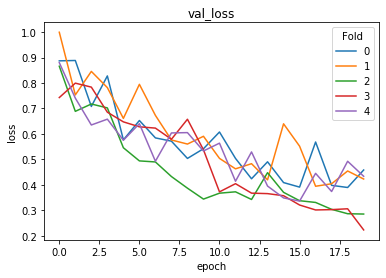

0 loss 0.2625969223678112
1 loss 0.2812167429498264
2 loss 0.26989813255412237
3 loss 0.29761002862027713
4 loss 0.27031034646289687
mean: 0.27632643459098677 sd: 0.012189523206234183


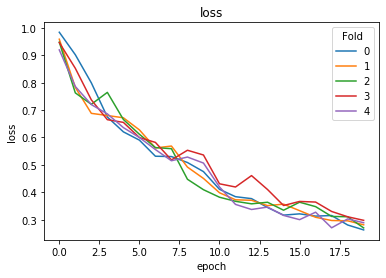

0 val_accuracy 0.8639615774154663
1 val_accuracy 0.8445965647697449
2 val_accuracy 0.8843603134155273
3 val_accuracy 0.8905341029167175
4 val_accuracy 0.8658786416053772
mean: 0.8698662400245667 sd: 0.0162884080815498


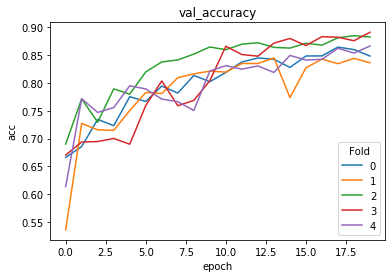

0 accuracy 0.8960206
1 accuracy 0.89065117
2 accuracy 0.895643
3 accuracy 0.88276416
4 accuracy 0.896919
mean: 0.8923995859999998 sd: 0.005290651611616835


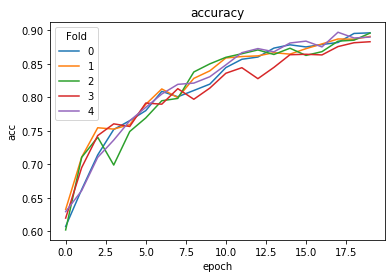

0 val_mean_io_u 0.3753478229045868
1 val_mean_io_u 0.37504082918167114
2 val_mean_io_u 0.37503793835639954
3 val_mean_io_u 0.3750465214252472
4 val_mean_io_u 0.3750205636024475
mean: 0.37509873509407043 sd: 0.00012484480338771615


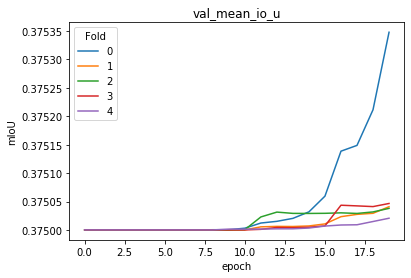

0 mean_io_u 0.37526464
1 mean_io_u 0.37503645
2 mean_io_u 0.3750346
3 mean_io_u 0.3750459
4 mean_io_u 0.37501863
mean: 0.375080044 sd: 9.27132884973784e-05


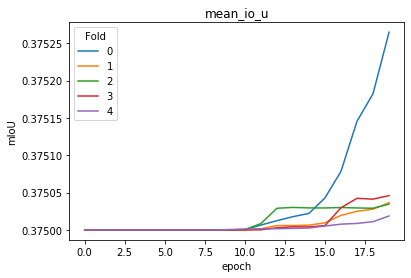

In [76]:
import matplotlib.pyplot as plt

def get_histories(var = 'val_loss', y_label = 'loss', helper_fun = np.min):
    hists = []
    best_vals = []
    for k in histories.keys():
        history = histories[k]
        #loss
        plt.plot(history[var], label=k)
        hists.append(history[var])
        best_val = helper_fun(history[var])
        best_vals.append(best_val)
        print(k, var, best_val)
    print('mean:', np.mean(best_vals), 'sd:', np.std(best_vals))
    plt.legend(title="Fold")
    plt.title(var)
    plt.xlabel('epoch')
    plt.ylabel(y_label)
    plt.show()
    return hists
    
val_loss = get_histories(var='val_loss', y_label = 'loss', helper_fun=np.min)
loss = get_histories(var='loss', y_label = 'loss', helper_fun=np.min)
val_accuracy = get_histories(var='val_accuracy', y_label = 'acc', helper_fun=np.max)
accuracy = get_histories(var='accuracy', y_label = 'acc', helper_fun=np.max)
val_mean_io_u = get_histories(var='val_mean_io_u', y_label = 'mIoU', helper_fun=np.max)
mean_io_u = get_histories(var='mean_io_u', y_label = 'mIoU', helper_fun=np.max)


In [64]:
def plot_mean_sd_line(data, label="mean validation loss"):
    data = np.array(data)
    mean = np.mean(data, axis=0)
    sd = np.std(data, axis=0)
    
    print(label, mean[-1])

    x = range(len(mean))

    plt.plot(x, mean, label=label)
    plt.fill_between(x, mean - sd, mean + sd, alpha = 0.2)


mean validation loss 0.36447398364543915
mean loss 0.2800295843183994


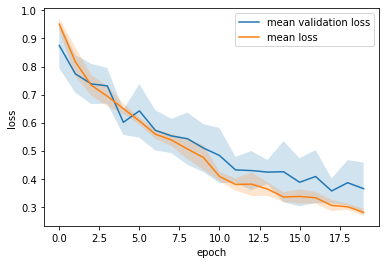

In [65]:
# plot loss vs validation loss
plot_mean_sd_line(val_loss, label='mean validation loss')
plot_mean_sd_line(loss, label='mean loss')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

mean validation acc 0.8643980145454406
mean acc 0.8909492059999998


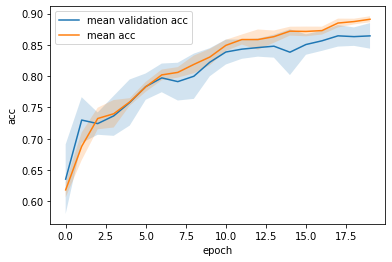

In [66]:
# plot acc vs validation acc
plot_mean_sd_line(val_accuracy, label='mean validation acc')
plot_mean_sd_line(accuracy, label='mean acc')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

mean validation mIoU 0.37509873509407043
mean mIoU 0.375080044


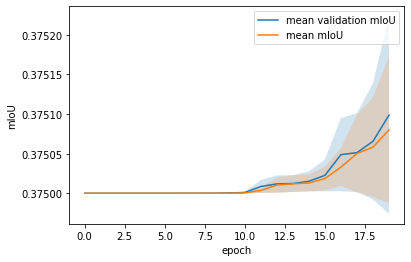

In [67]:
# plot miou vs validation miou
plot_mean_sd_line(val_mean_io_u, label='mean validation mIoU')
plot_mean_sd_line(mean_io_u, label='mean mIoU')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('mIoU')
plt.show()